In [114]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform as sp_rand
%matplotlib inline
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [115]:
print("Shape of DF is ", df.shape)

Shape of DF is  (569, 30)


In [116]:
# Check for missing data
print("Number of Missing Values is ", df.isna().sum().sum())

Number of Missing Values is  0


In [117]:
print(df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [118]:
# Select columns with 'mean','worst','error'
df_mean = df.iloc[:,0:10]
df_error = df.iloc[:,11:20]
df_worst = df.iloc[:,21:31]

<AxesSubplot:>

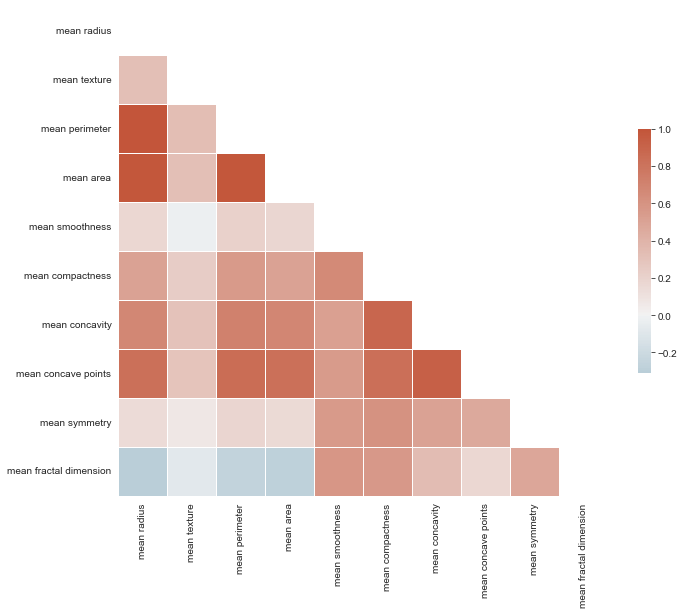

In [119]:
# Correlation Matrix
corr = df_mean.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

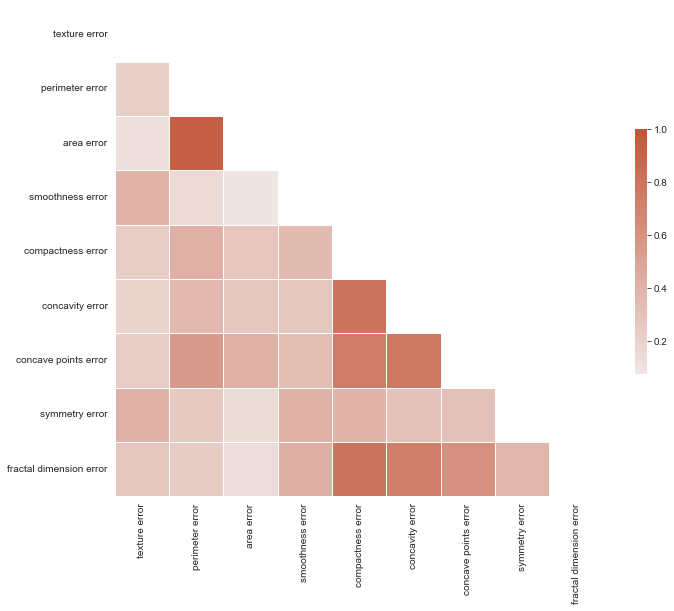

In [120]:
# Correlation Matrix
corr = df_error.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

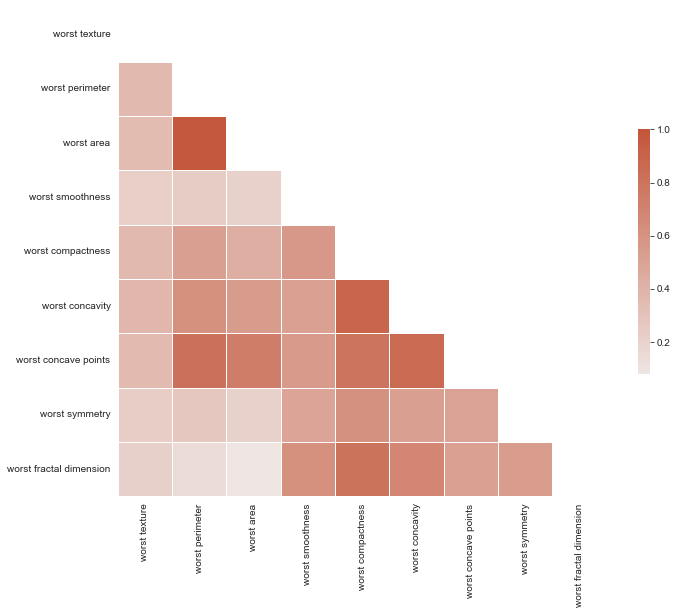

In [121]:
# Correlation Matrix
corr = df_worst.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

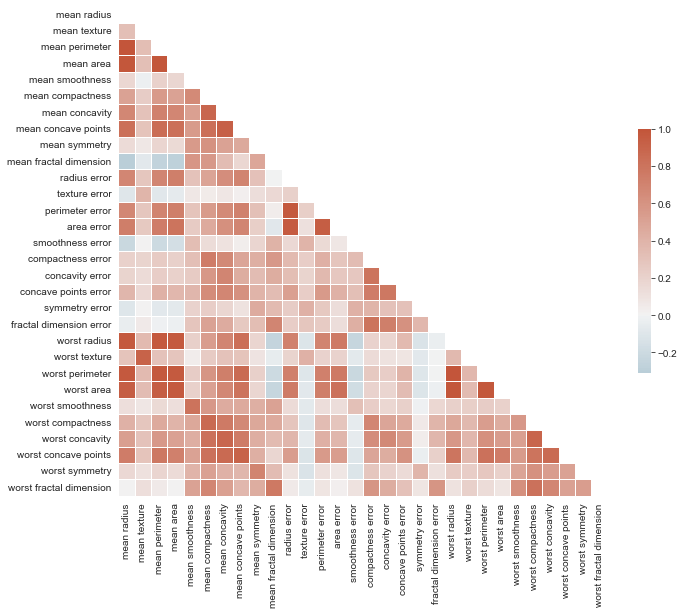

In [122]:
# Correlation Matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

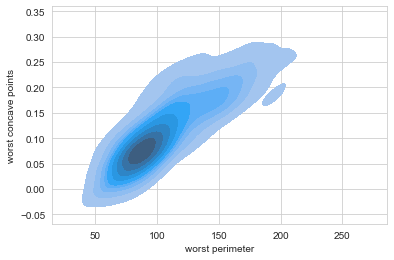

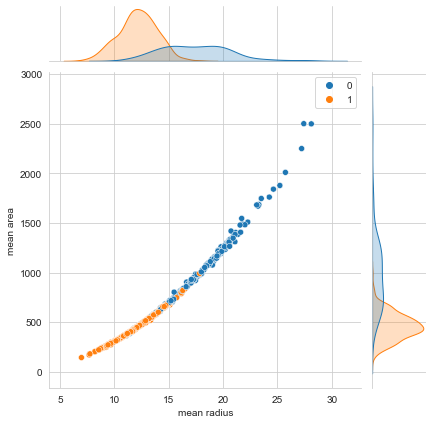

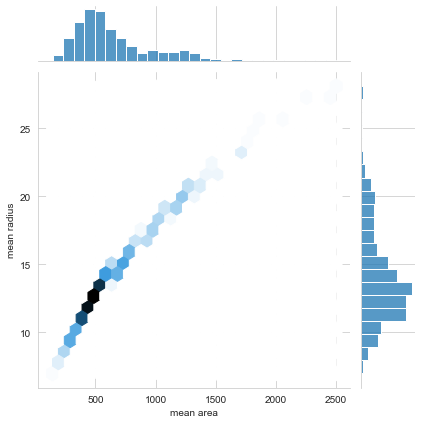

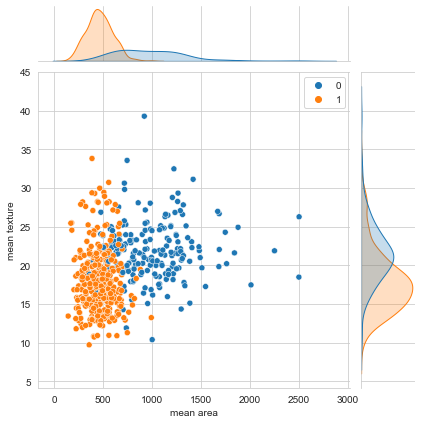

In [123]:
# Bivariate plots
sns.kdeplot(x = df['worst perimeter'], y = df['worst concave points'], fill=True)
sns.jointplot(x = df['mean radius'], y = df['mean area'], hue = cancer.target)
sns.jointplot(x = df['mean area'], y = df['mean radius'],kind = "hex")
sns.jointplot(x = df['mean area'], y = df['mean texture'], hue = cancer.target)

### PCA: Identifying Optimal Number of Components and Transforming Data via Selected PCs


In [124]:
X_trn, X_test, Y_trn, Y_test = train_test_split(cancer.data, cancer.target, test_size=0.25,
                                               stratify=cancer.target, random_state=30)

scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_test = scaler.transform(X_test)

print("train feature shape: ", X_trn.shape)
print("test feature shape ", X_test.shape)

train feature shape:  (426, 30)
test feature shape  (143, 30)


#### Scree Plot

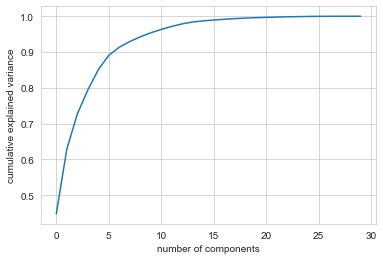

In [125]:
pca = PCA().fit(X_trn)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [126]:
# Cumulative Variance Explained Enumerated
np.cumsum(pca.explained_variance_ratio_)

array([0.44765082, 0.62842714, 0.72665837, 0.7937946 , 0.85058435,
       0.8906236 , 0.91336593, 0.92929996, 0.94240751, 0.95372005,
       0.96316102, 0.9715392 , 0.97872878, 0.98398374, 0.98705995,
       0.98949309, 0.99154461, 0.99338096, 0.99488125, 0.99592497,
       0.99683541, 0.99761838, 0.99835917, 0.99893838, 0.99943693,
       0.99969228, 0.99992071, 0.99997174, 0.99999625, 1.        ])

**We will choose 4 Principal Components because they explain 80% of the variance cumulatively**

In [127]:
# Fit/transform data
pca = PCA(n_components=4)
scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_test = scaler.transform(X_test)
X_trn = pca.fit_transform(X_trn)
X_test = pca.transform(X_test)

#### New Reduced-Dimensionality Dataset

In [128]:
dfpca = pd.DataFrame(X_trn, columns = ['PC1','PC2','PC3','PC4'])
dfpca.head()

,PC1,PC2,PC3,PC4
0,4.769821,-2.646802,0.690643,-0.092336
1,-3.286009,0.145666,0.605058,0.574733
2,-0.916999,2.463817,0.447156,-0.382932
3,3.577654,-0.941917,0.382554,-1.312159
4,7.187707,12.444114,7.700283,-2.390005


**Rescaled Relative Variance explained by individual PC's**

In [129]:
# Variance Contributions
fvar = np.var(dfpca, axis = 0)
fvar_rat = fvar/np.sum(fvar)
print("Variance ratio of the 4 PCA groups is ", fvar_rat)

Variance ratio of the 4 PCA groups is  PC1    0.563938
PC2    0.227737
PC3    0.123749
PC4    0.084576
dtype: float64


C:\Users\gmg30\AppData\Local\Temp/ipykernel_13760/2601628866.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


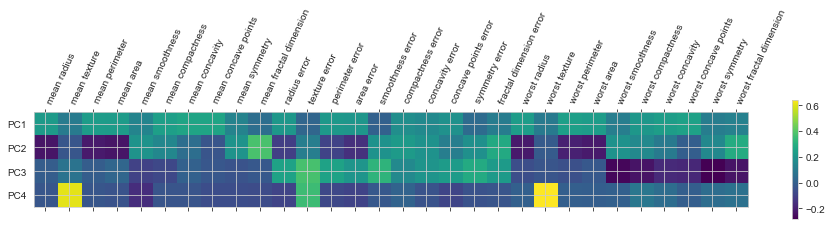

In [130]:
# Heatmap of what features compose our 4 PCs

plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['PC1','PC2','PC3','PC4'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

#### Classification/Separation Plots Using Reduced-Dimensionality Dataset

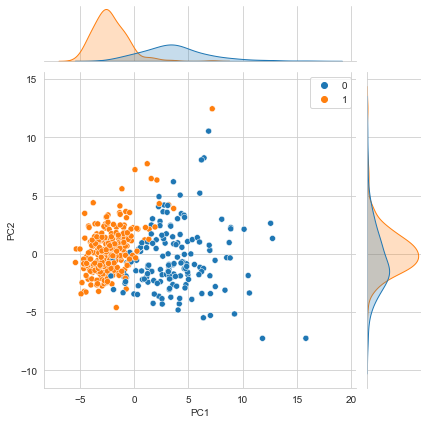

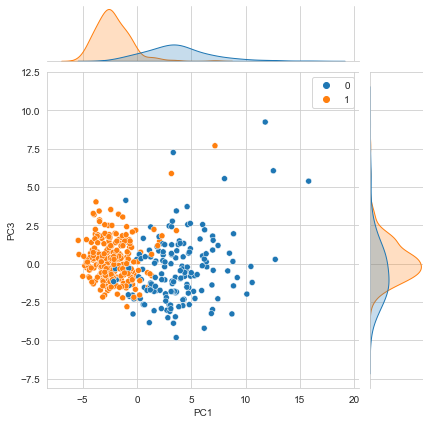

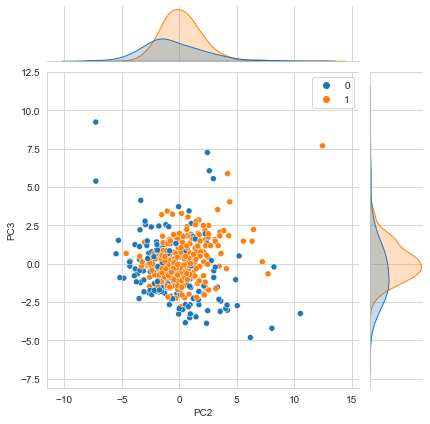

In [131]:
# Plot cancer data for 4 PCs
sns.jointplot(x = dfpca['PC1'], y = dfpca['PC2'], hue = Y_trn)
sns.jointplot(x = dfpca['PC1'], y = dfpca['PC3'], hue = Y_trn)
sns.jointplot(x = dfpca['PC2'], y = dfpca['PC3'], hue = Y_trn)

### Hyperparameter Tuning for SVM using GridSearchCV (#1)
 - Now that we've identified our four PCs and transformed our data, we will select hyperparameters for use in SVM
 - We will use a GridSearchCV method first

**First we need to define an accuracy report borrowed from analyticsvidhya**
 - https://www.analyticsvidhya.com/blog/2021/07/svm-and-pca-tutorial-for-beginners/

In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def print_score(clf, X_trn, Y_trn, X_test, Y_test, train=True):
    if train:
        pred = clf.predict(X_trn)
        clf_report = pd.DataFrame(classification_report(Y_trn, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(Y_trn, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_trn, pred)}\n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(Y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_test, pred)}\n")

In [133]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=2)
grid.fit(X_trn, Y_trn)


best_params = grid.best_params_
print(f"Best params: {best_params}")

Fitting 2 folds for each of 126 candidates, totalling 252 fits
Best params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


#### Performance of SVC with Best Parameters Identified From GridSearchCV (#1)

In [134]:
svm_clf = SVC(**best_params)
svm_clf.fit(X_trn, Y_trn)
print_score(svm_clf, X_trn, Y_trn, X_test, Y_test, train=True)
print_score(svm_clf, X_trn, Y_trn, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 96.48%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.961538    0.966667  0.964789    0.964103      0.964753
recall       0.943396    0.977528  0.964789    0.960462      0.964789
f1-score     0.952381    0.972067  0.964789    0.962224      0.964719
support    159.000000  267.000000  0.964789  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[150   9]
 [  6 261]]

Test Result:
Accuracy Score: 97.20%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   1.000000   0.957447  0.972028    0.978723      0.973218
recall      0.924528   1.000000  0.972028    0.962264      0.972028
f1-score    0.960784   0.978261  0.972028    0.969523      0.971784
support    53.000000  90.000000  0.972028  143.000000    143.000000
___

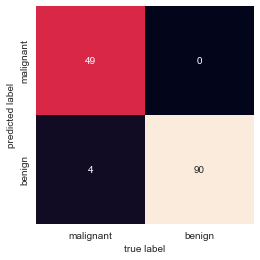

In [135]:
Y_pred = svm_clf.predict(X_test)
mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
        xticklabels=cancer.target_names,
        yticklabels=cancer.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Hyperparameter Tuning for SVM using RandomizedSearchCV (#2)
 - Now we will use a RandomSearch

In [136]:
# Hyperparameter Tuning
param_grid = {'C': sp_rand(0,1000), 
              'gamma': sp_rand(0,50), 
              'kernel': ['rbf', 'poly', 'linear']} 

rsearch = RandomizedSearchCV(SVC(), param_grid, n_iter=100, cv=2)
rsearch.fit(X_trn, Y_trn)


best_params = rsearch.best_params_
print(f"Best params: {best_params}")

Best params: {'C': 525.8023719023453, 'gamma': 38.68218196204059, 'kernel': 'linear'}


#### Performance of SVC with Best Parameters Identified from RandomizedSearchCV

In [137]:
svm_clf = SVC(**best_params)
svm_clf.fit(X_trn, Y_trn)
print_score(svm_clf, X_trn, Y_trn, X_test, Y_test, train=True)
print_score(svm_clf, X_trn, Y_trn, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 95.77%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.960784    0.956044  0.957746    0.958414      0.957813
recall       0.924528    0.977528  0.957746    0.951028      0.957746
f1-score     0.942308    0.966667  0.957746    0.954487      0.957575
support    159.000000  267.000000  0.957746  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[147  12]
 [  6 261]]

Test Result:
Accuracy Score: 97.90%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   1.000000   0.967742  0.979021    0.983871      0.979698
recall      0.943396   1.000000  0.979021    0.971698      0.979021
f1-score    0.970874   0.983607  0.979021    0.977240      0.978887
support    53.000000  90.000000  0.979021  143.000000    143.000000
___

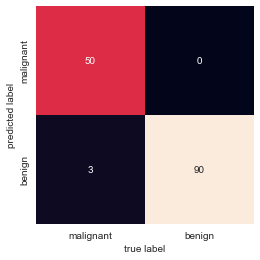

In [138]:
Y_pred = svm_clf.predict(X_test)
mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
        xticklabels=cancer.target_names,
        yticklabels=cancer.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');